In [1]:
import dvc.api
import numpy as np
import torch
from torch.utils.data import DataLoader
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import importlib

import preprocess
from data_loader import MAPDataset
from preprocess import read_load_trace_data, preprocessing

importlib.reload(preprocess)
params = dvc.api.params_show("../params.yaml")
hardware = params["hardware"]
batch_size = params["trace-data"]["batch-size"]
train_data, eval_data = read_load_trace_data("/home/neel/Desktop/LoadTraces/spec06/473.astar-s0.txt.xz", 20, 30, 1)

df_train = preprocessing(train_data, hardware)
df_test = preprocessing(eval_data, hardware)

# Choose the fields to cluster the data by
# data_test = df_test[['block_address', 'page_address', 'page_offset', 'block_index']]
# data_train = df_train[['block_address', 'page_address', 'page_offset', 'block_index']]

# train_dataset = MAPDataset(df_train)
# test_dataset = MAPDataset(df_test)

# train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True,collate_fn=train_dataset.collate_fn)
# test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False,collate_fn=test_dataset.collate_fn)



preprocessing with context
past block addr list ['block_addr_past_9', 'block_addr_past_8', 'block_addr_past_7', 'block_addr_past_6', 'block_addr_past_5', 'block_addr_past_4', 'block_addr_past_3', 'block_addr_past_2', 'block_addr_past_1']
past block addr abs 0            [nan, nan, nan, nan, nan, nan, nan, nan, nan]
1        [nan, nan, nan, nan, nan, nan, nan, nan, 34752...
2        [nan, nan, nan, nan, nan, nan, nan, 3475289722...
3        [nan, nan, nan, nan, nan, nan, 3475289722077.0...
4        [nan, nan, nan, nan, nan, 3475289722077.0, 370...
                               ...                        
47938    [790741858386.0, 790741854831.0, 3882863708868...
47939    [790741854831.0, 3882863708868.0, 195568334423...
47940    [3882863708868.0, 1955683344239.0, 37043009531...
47941    [1955683344239.0, 3704300953106.0, 34752897353...
47942    [3704300953106.0, 3475289735314.0, 34752897297...
Name: past_block_addr_abs, Length: 47943, dtype: object
preprocessing with context
past block

In [2]:
df_train

id     cycle             addr       ip    hit              raw   
9       1002809   1484359  222418542225216  4221929  False  222418542225216  \
10      1002851   1484603  222418542229312  4221929  False  222418542229312   
11      1002893   1484735  222418542233408  4221929  False  222418542233408   
12      1003325   1485199  125163734549824  4223072  False  125163734549824   
14      1003835   1486245  222418542237952  4221929  False  222418542237952   
...         ...       ...              ...      ...    ...              ...   
47805  19951543  27058233  248503277370688  4223072  False  248503277370688   
47808  19952518  27059743  248503277370624  4223072  False  248503277370624   
47809  19953445  27060887  248503277370560  4223072  False  248503277370560   
47812  19954700  27062587  248503277370496  4223072  False  248503277370496   
47813  19955617  27063800  248503277370432  4223072  False  248503277370432   

       block_address  page_address  page_offset  block_index   
9      3475289722269   54301401910         1856           29  \
10     3475289722333   54301401911         1856           29   
11     3475289722397   54301401912         1856           29   
12     1955683352341   30557552380         1344           21   
14     3475289722468   54301401913         2304           36   
...              ...           ...          ...          ...   
47805  3882863708917   60669745451         3392           53   
47808  3882863708916   60669745451         3328           52   
47809  3882863708915   60669745451         3264           51   
47812  3882863708914   60669745451         3200           50   
47813  3882863708913   60669745451         3136           49   

       block_addr_delta                                              patch   
9          1.519606e+12  [0.453125, 0.84375, 0.1875, 0.40625, 0.609375,...  \
10         6.400000e+01  [0.453125, 0.859375, 0.1875, 0.40625, 0.609375...   
11         6.400000e+01  [0.453125, 0.875, 0.1875, 0.40625, 0.609375, 0...   
12        -1.519606e+12  [0.328125, 0.9375, 0.921875, 0.796875, 0.35937...   
14         1.519606e+12  [0.5625, 0.890625, 0.1875, 0.40625, 0.609375, ...   
...                 ...                                                ...   
47805      1.335233e+12  [0.828125, 0.671875, 0.5625, 0.703125, 0.1875,...   
47808      8.243724e+11  [0.8125, 0.671875, 0.5625, 0.703125, 0.1875, 0...   
47809     -1.000000e+00  [0.796875, 0.671875, 0.5625, 0.703125, 0.1875,...   
47812      3.238910e+12  [0.78125, 0.671875, 0.5625, 0.703125, 0.1875, ...   
47813     -1.000000e+00  [0.765625, 0.671875, 0.5625, 0.703125, 0.1875,...   

                                                    past   
9      [[0.453125, 0.796875, 0.1875, 0.40625, 0.60937...  \
10     [[0.265625, 0.15625, 0.765625, 0.53125, 0.8906...   
11     [[0.375, 0.9375, 0.921875, 0.796875, 0.359375,...   
12     [[0.359375, 0.9375, 0.921875, 0.796875, 0.3593...   
14     [[0.09375, 0.8125, 0.1875, 0.40625, 0.609375, ...   
...                                                  ...   
47805  [[0.03125, 0.0625, 0.796875, 0.875, 0.421875, ...   
47808  [[0.6875, 0.5625, 0.25, 0.59375, 0.65625, 0.06...   
47809  [[0.6875, 0.53125, 0.171875, 0.09375, 0.125, 0...   
47812  [[0.75, 0.640625, 0.796875, 0.59375, 0.25, 0.6...   
47813  [[0.390625, 0.109375, 0.265625, 0.59375, 0.656...   

                                         past_block_addr   
9      [3475289722077.0, 3704300966545.0, 19556833523...  \
10     [3704300966545.0, 1955683352344.0, 19556833523...   
11     [1955683352344.0, 1955683352343.0, 39859556913...   
12     [1955683352343.0, 3985955691339.0, 34752897221...   
14     [3475289722118.0, 3475289722207.0, 19556833490...   
...                                                  ...   
47805  [790741856514.0, 3882863708919.0, 337669392476...   
47808  [2547630278956.0, 251391424684.0, 251391424556...   
47809  [251391424684.0, 251391424556.0, 3882863708918...   
47812  [2452704934512.0, 254763028117

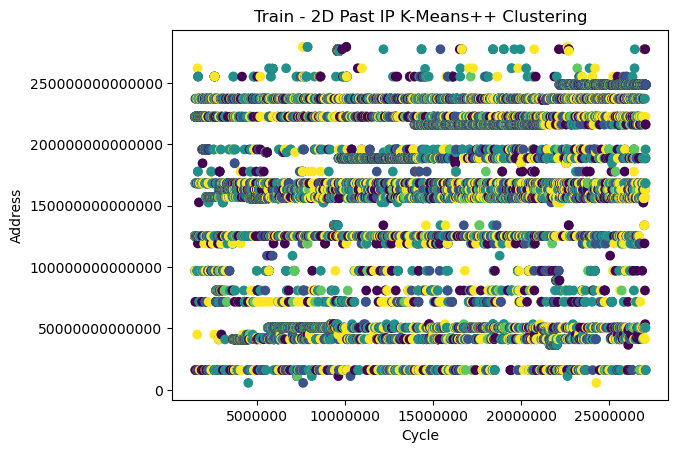

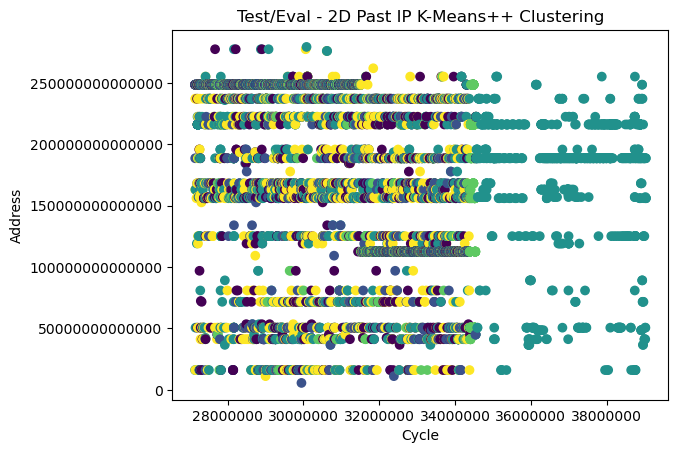

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data_train = df_train['past_ip'].values
data_train = np.array(data_train.tolist())

data_test = df_test['past_ip'].values
data_test = np.array(data_test.tolist())

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)

df_train["cluster"] = kmeans.fit_predict(data_train)
df_test["cluster"] = kmeans.predict(data_test)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])

plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Train - 2D Past IP K-Means++ Clustering')

plt.ticklabel_format(style='plain')
plt.show()

plt.scatter(df_test['cycle'], df_test['addr'], c=df_test['cluster'])

plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Test/Eval - 2D Past IP K-Means++ Clustering')

plt.ticklabel_format(style='plain')
plt.show()

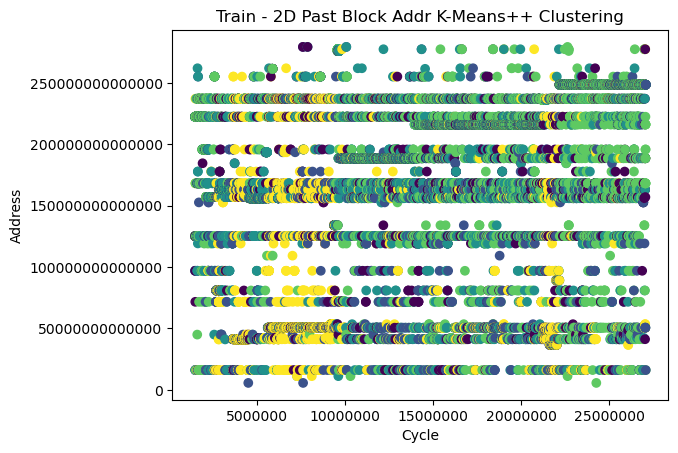

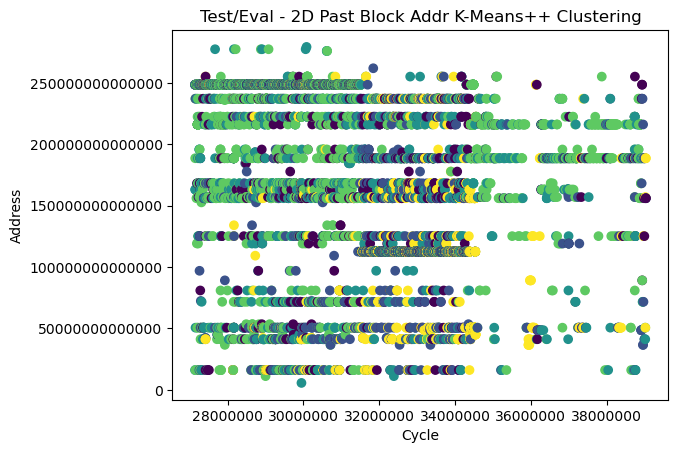

In [14]:
data_train = df_train['past_block_addr'].values
data_train = np.array(data_train.tolist())

data_test = df_test['past_block_addr'].values
data_test = np.array(data_test.tolist())

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)

df_train["cluster"] = kmeans.fit_predict(data_train)
df_test["cluster"] = kmeans.predict(data_test)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])

plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Train - 2D Past Block Addr K-Means++ Clustering')

plt.ticklabel_format(style='plain')
plt.show()

plt.scatter(df_test['cycle'], df_test['addr'], c=df_test['cluster'])

plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Test/Eval - 2D Past Block Addr K-Means++ Clustering')

plt.ticklabel_format(style='plain')
plt.show()

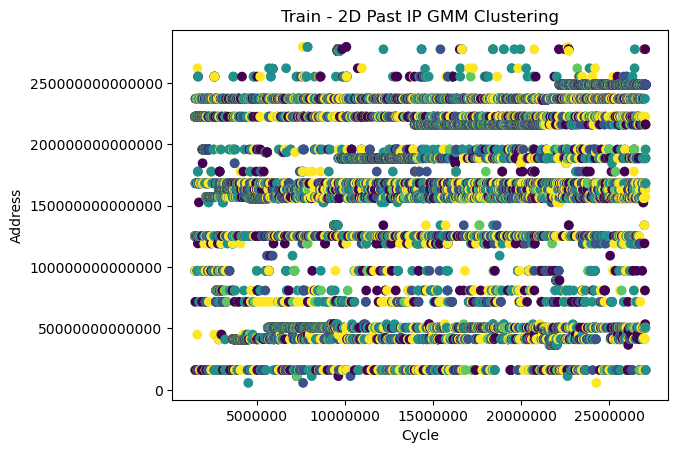

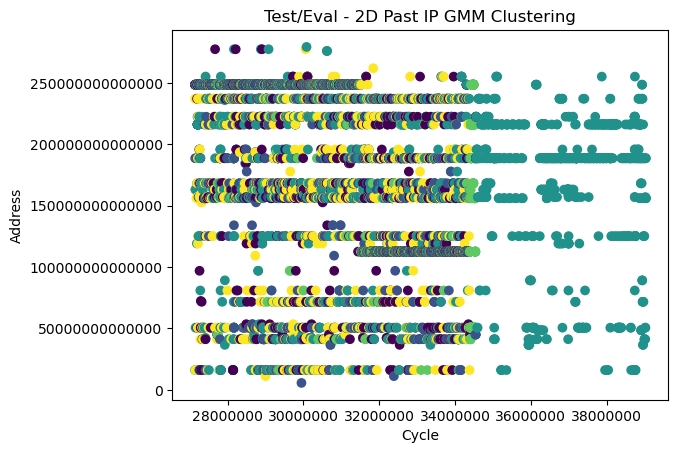

In [15]:
from sklearn.mixture import GaussianMixture


data_train = df_train['past_ip'].values
data_train = np.array(data_train.tolist())

data_test = df_test['past_ip'].values
data_test = np.array(data_test.tolist())

gmm = GaussianMixture(n_components=5, random_state=0, n_init=10)

df_train["cluster"] = kmeans.fit_predict(data_train)
df_test["cluster"] = kmeans.predict(data_test)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])

plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Train - 2D Past IP GMM Clustering')

plt.ticklabel_format(style='plain')
plt.show()

plt.scatter(df_test['cycle'], df_test['addr'], c=df_test['cluster'])

plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Test/Eval - 2D Past IP GMM Clustering')

plt.ticklabel_format(style='plain')
plt.show()

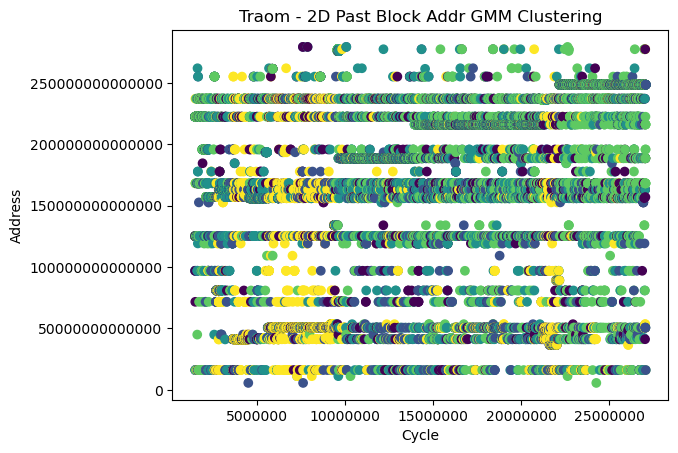

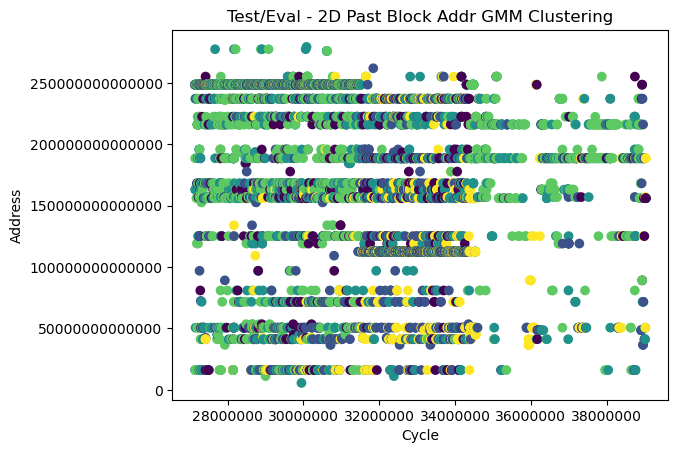

In [16]:
data_train = df_train['past_block_addr'].values
data_train = np.array(data_train.tolist())

data_test = df_test['past_block_addr'].values
data_test = np.array(data_test.tolist())

gmm = GaussianMixture(n_components=5, random_state=0, n_init=10)

df_train["cluster"] = kmeans.fit_predict(data_train)
df_test["cluster"] = kmeans.predict(data_test)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])

plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Traom - 2D Past Block Addr GMM Clustering')

plt.ticklabel_format(style='plain')
plt.show()

plt.scatter(df_test['cycle'], df_test['addr'], c=df_test['cluster'])

plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Test/Eval - 2D Past Block Addr GMM Clustering')

plt.ticklabel_format(style='plain')
plt.show()

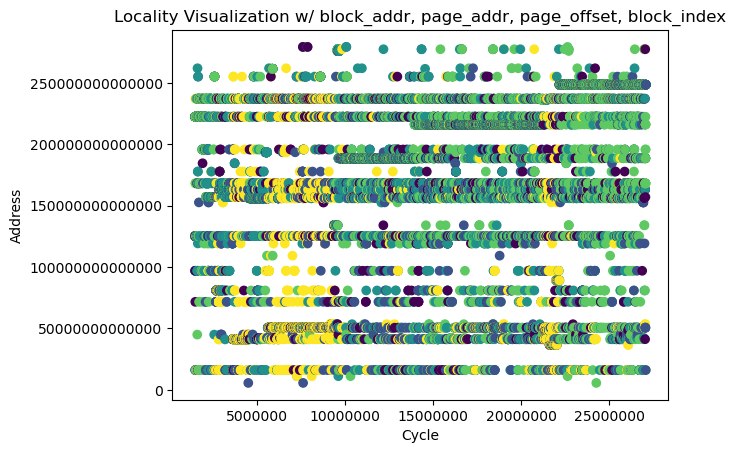

In [7]:
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)

data_train = df_train['past_block_addr'].values
data_train = np.array(data_train.tolist())
 
# df_test["cluster"] = kmeans.fit_predict(data_test) 
df_train['cluster'] = kmeans.fit_predict(data_train)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ block_addr, page_addr, page_offset, block_index')

plt.ticklabel_format(style='plain')
plt.show()

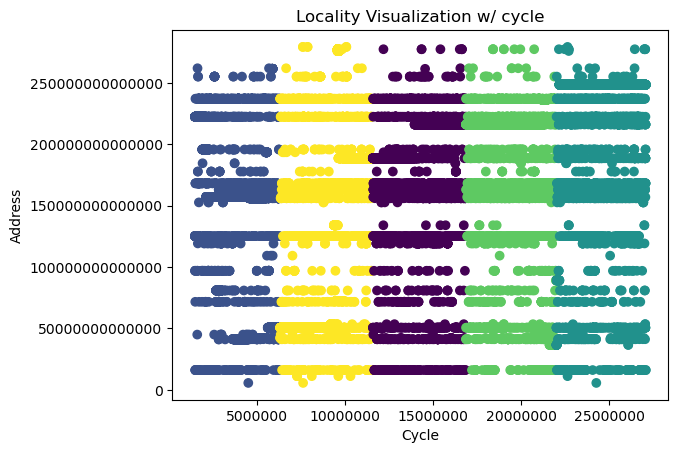

In [ ]:
# Select different data to cluster by
data_train = df_train[['cycle']]

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
df_train['cluster'] = kmeans.fit_predict(data_train)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ cycle')

plt.ticklabel_format(style='plain')
plt.show()


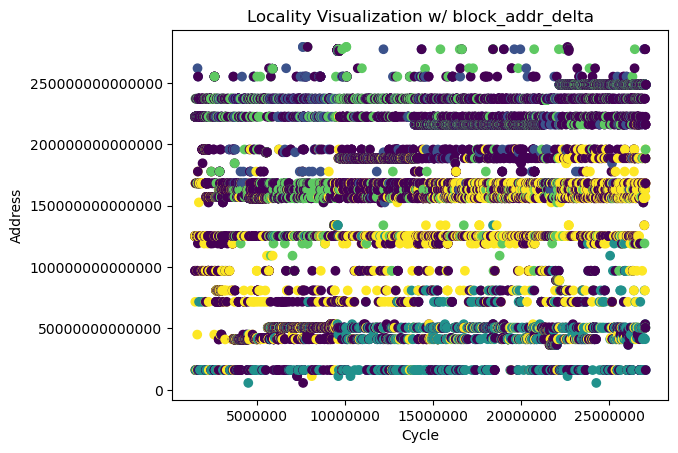

In [ ]:
# Select different data to cluster by
data_train = df_train[['block_addr_delta']]

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
df_train['cluster'] = kmeans.fit_predict(data_train)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ block_addr_delta')

plt.ticklabel_format(style='plain')
plt.show()


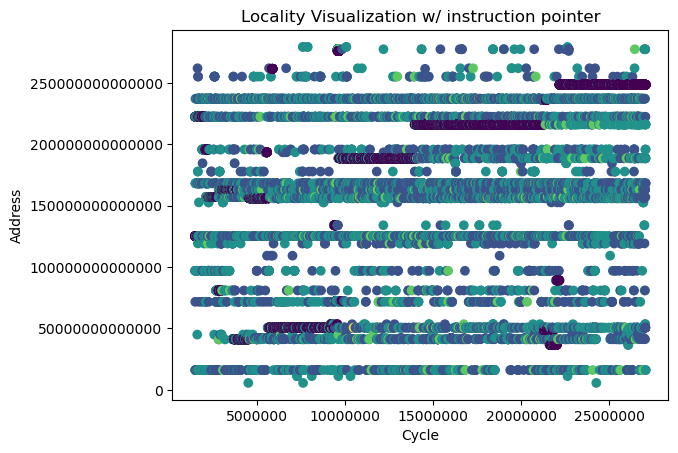

In [ ]:
# Select different data to cluster by
data_train = df_train[['ip']]

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
df_train['cluster'] = kmeans.fit_predict(data_train)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ instruction pointer')

plt.ticklabel_format(style='plain')
plt.show()

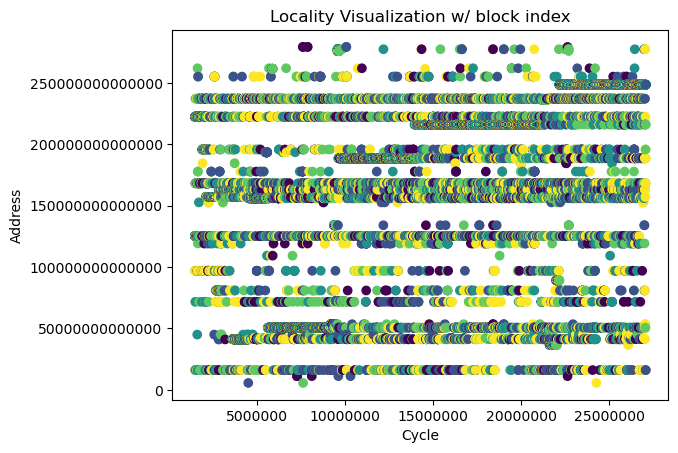

In [ ]:
# Select different data to cluster by
data_train = df_train[['block_index']]
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
df_train['cluster'] = kmeans.fit_predict(data_train)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ block index')

plt.ticklabel_format(style='plain')
plt.show()

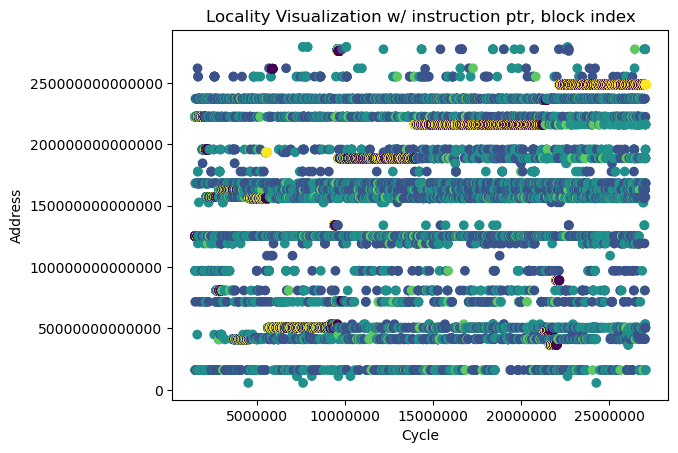

In [ ]:
# Select different data to cluster by
data_train = df_train[['ip','block_index']]
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
df_train['cluster'] = kmeans.fit_predict(data_train)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ instruction ptr, block index')

plt.ticklabel_format(style='plain')
plt.show()

In [4]:
from sklearn.mixture import GaussianMixture

# Select the data to cluster by
data_train = df_train['past_block_addr'].values


# Create a Gaussian Mixture Model object with the desired number of clusters
n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, random_state=0)

# Fit the GMM model to your data
gmm.fit(data_train)

# Predict the cluster labels for each sample
clusters = gmm.predict(data_train)

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization GMM w/ addr')

plt.ticklabel_format(style='plain')
plt.show()

ValueError: setting an array element with a sequence.

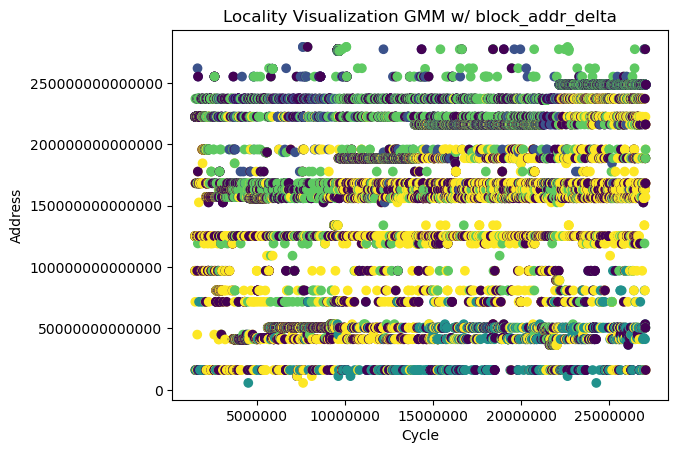

In [ ]:
# Select the data to cluster by
data_train = df_train[['block_addr_delta']]

# Create a Gaussian Mixture Model object with the desired number of clusters
n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, random_state=0)

# Fit the GMM model to your data
gmm.fit(data_train)

# Predict the cluster labels for each sample
clusters = gmm.predict(data_train)

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization GMM w/ block_addr_delta')

plt.ticklabel_format(style='plain')
plt.show()

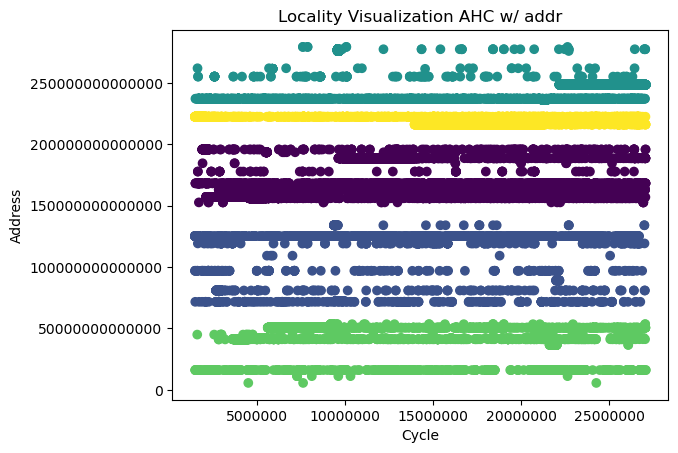

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Select the data to cluster by
data_train = df_train[['addr']]

# Create an AgglomerativeClustering object with the desired number of clusters
n_clusters = 5
ahc = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the AHC model to your data
ahc.fit(data_train)

# Predict the cluster labels for each sample
clusters = ahc.labels_

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization AHC w/ addr')

plt.ticklabel_format(style='plain')
plt.show()

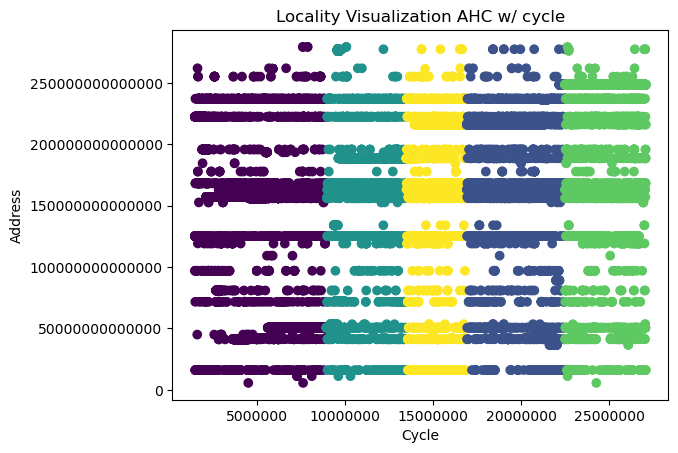

In [ ]:
# Select the data to cluster by
data_train = df_train[['cycle']]

# Create an AgglomerativeClustering object with the desired number of clusters
n_clusters = 5
ahc = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the AHC model to your data
ahc.fit(data_train)

# Predict the cluster labels for each sample
clusters = ahc.labels_

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization AHC w/ cycle')

plt.ticklabel_format(style='plain')
plt.show()

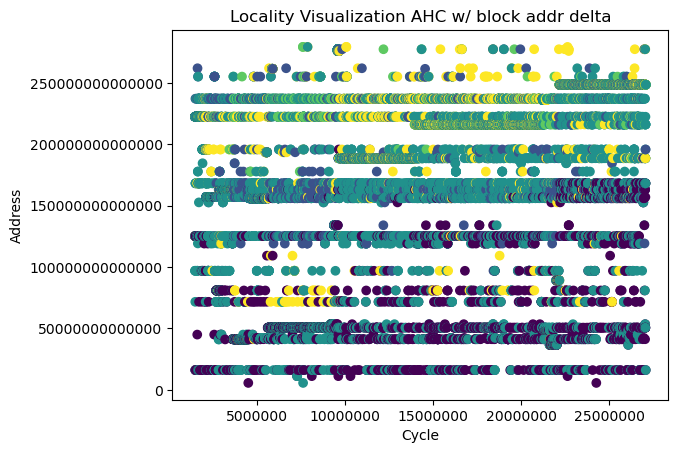

In [ ]:
# Select the data to cluster by
data_train = df_train[['block_addr_delta']]

# Create an AgglomerativeClustering object with the desired number of clusters
n_clusters = 5
ahc = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the AHC model to your data
ahc.fit(data_train)

# Predict the cluster labels for each sample
clusters = ahc.labels_

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization AHC w/ block addr delta')

plt.ticklabel_format(style='plain')
plt.show()

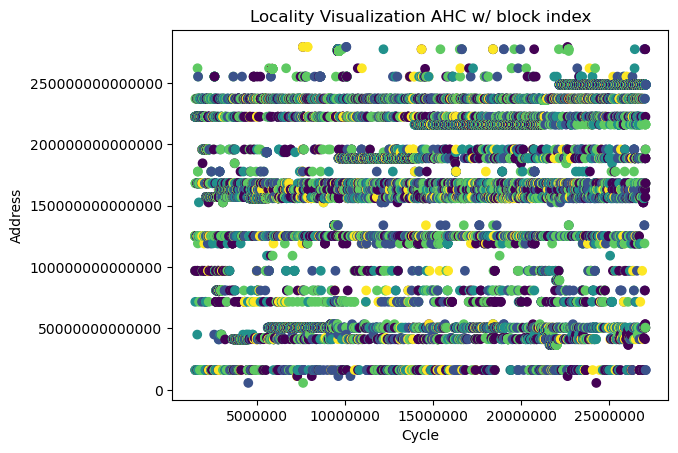

In [ ]:
# Select the data to cluster by
data_train = df_train[['block_index']]

# Create an AgglomerativeClustering object with the desired number of clusters
n_clusters = 5
ahc = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the AHC model to your data
ahc.fit(data_train)

# Predict the cluster labels for each sample
clusters = ahc.labels_

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization AHC w/ block index')

plt.ticklabel_format(style='plain')
plt.show()

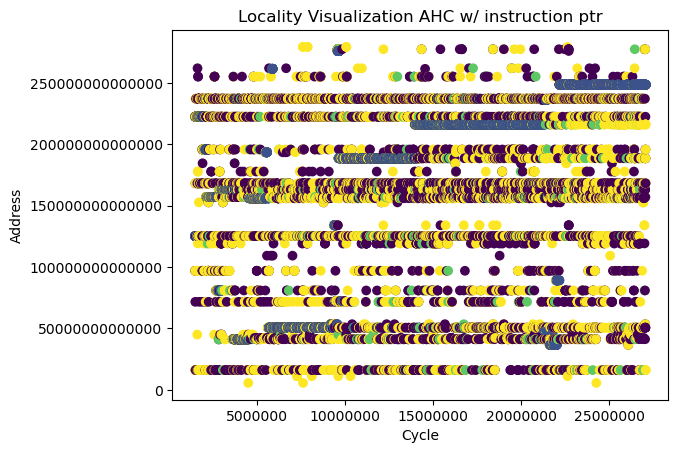

In [ ]:
# Select the data to cluster by
data_train = df_train[['ip']]

# Create an AgglomerativeClustering object with the desired number of clusters
n_clusters = 5
ahc = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the AHC model to your data
ahc.fit(data_train)

# Predict the cluster labels for each sample
clusters = ahc.labels_

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization AHC w/ instruction ptr')

plt.ticklabel_format(style='plain')
plt.show()

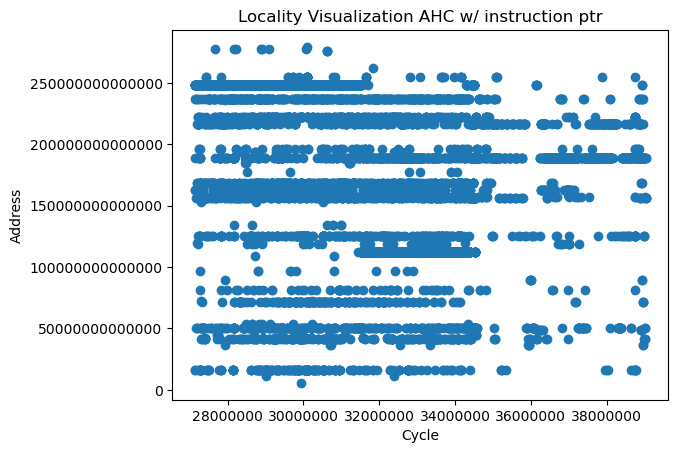

In [ ]:
data_test = df_test[['block_addr_delta']]

plt.scatter(df_test['cycle'], df_test['addr'])
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization AHC w/ instruction ptr')

plt.ticklabel_format(style='plain')
plt.show()

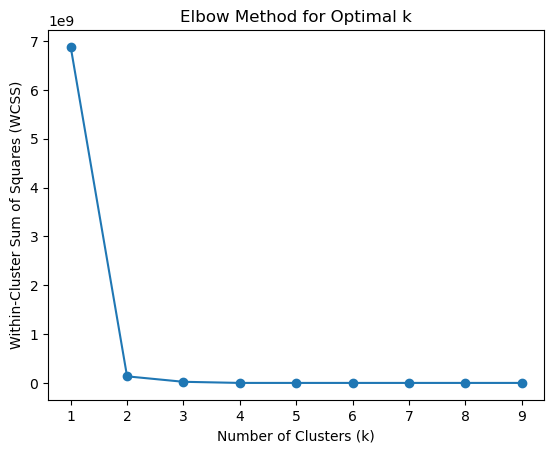

In [ ]:
inertia = []
k_values = range(1, 10)  # Vary the range according to your needs

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(data_train)
    inertia.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

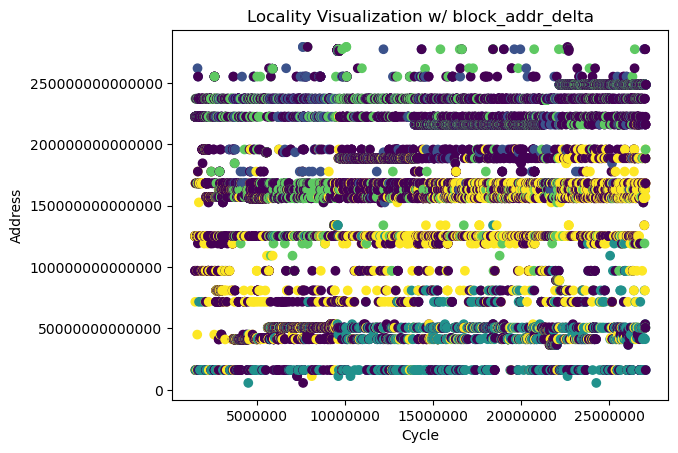

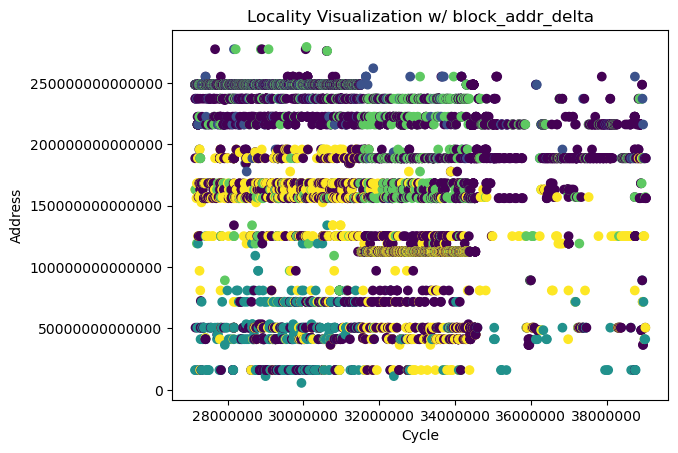

In [ ]:
# Select different data to cluster by
data_train = df_train[['block_addr_delta']]
data_test = df_test[['block_addr_delta']]

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
df_train['cluster'] = kmeans.fit_predict(data_train)
df_test['cluster'] = kmeans.predict(data_test)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ block_addr_delta')

plt.ticklabel_format(style='plain')
plt.show()

plt.scatter(df_test['cycle'], df_test['addr'], c=df_test['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ block_addr_delta')

plt.ticklabel_format(style='plain')
plt.show()

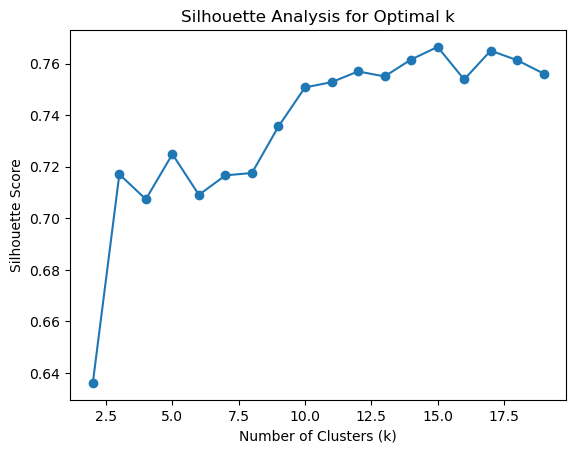

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_scores = []
k_values = range(2, 20)  # Vary the range according to your needs

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data_train)
    silhouette_avg = silhouette_score(data_train, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()